### Analisis de querys de publicaciones de twitter

In [ ]:
import pandas as pd
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
csvs = glob("*g/*.csv")
print(csvs[1])
csvs

### DataFrame General

In [ ]:
file = csvs[-5]

df = pd.read_csv(file, sep='|')
print(df.shape)
df.head()

(31334, 13)


,tipo,user,posted_at,deltaSec,retuits,favs,followers,followings,created at,id_status,RT_user,status_time,texto
0,Reply,WeBezos,06/14/2021 19:22:16,6729,0,0,375,74,05/02/2021 12:54:14,1404566850353180683,ArthurB,06/14/2021 17:30:07,@ArthurB Great new approach!Despite what other...
1,RT,MisaelSaTa,06/14/2021 19:22:15,36288,140,0,35,256,03/28/2010 18:25:49,1404442867456745479,maxkeiser,06/14/2021 09:17:27,RT @maxkeiser: We’ll be sacrificing Elon into ...
2,RT,WinterWinRiska,06/14/2021 19:22:14,34046,153,0,1621,1694,02/28/2021 02:38:35,1404452267600891910,CoinvoteCC,06/14/2021 09:54:48,RT @CoinvoteCC: We just released our telegram!...
3,RT,cryptohydrate,06/14/2021 19:22:14,189,15,0,1808,641,06/12/2018 07:47:38,1404594275279593472,CryptoKaleo,06/14/2021 19:19:05,RT @CryptoKaleo: #Bitcoin / $BTCSend it to $45...
4,Texto,ent_omega,06/14/2021 19:22:13,-1,0,0,287,32,01/11/2021 04:26:17,-1,no_user,-1,LTC just broke $180....it’s headed well over $...


### Descriptiva

In [ ]:
df.describe()

,deltaSec,retuits,favs,followers,followings,id_status
count,31334.000000,31334.000000,31334.000000,3.133400e+04,31334.000000,3.133400e+04
mean,15813.420023,880.273058,1.960171,5.537799e+03,1198.504723,1.079782e+18
std,20238.892944,2937.583436,41.772717,6.680969e+04,4400.857497,5.910050e+17
min,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00
25%,24.000000,0.000000,0.000000,2.900000e+01,94.000000,1.398015e+18
50%,5892.500000,23.000000,0.000000,1.490000e+02,333.000000,1.404432e+18
75%,26765.000000,303.750000,0.000000,7.110000e+02,995.000000,1.404524e+18
max,86399.000000,33680.000000,4285.000000,3.723479e+06,176838.000000,1.404595e+18


In [ ]:
freq = df.groupby('user').size().to_frame()
freq.columns = ['frecuencia']
freq = freq.sort_values('frecuencia', ascending=False)
freq.head(5)

,frecuencia
user,
bmurphypointman,323
GKHANGK57389016,208
v4_cydia,161
kaan34785824,111
heylisagirl,66


In [ ]:
query = file.split("\\")[1].split("_")[0]
query

'bitcoin'

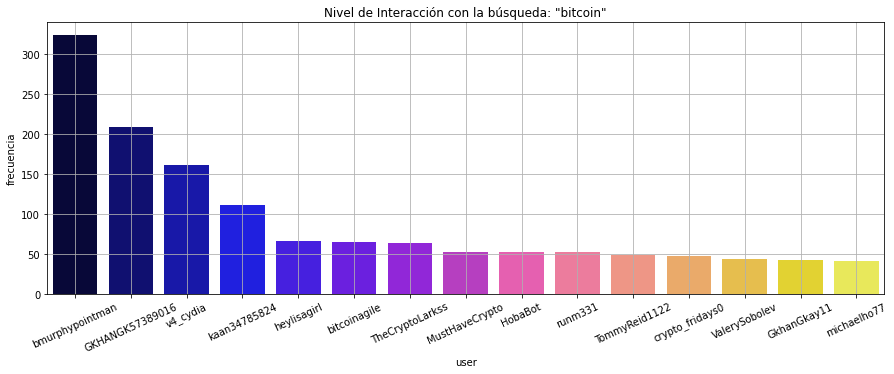

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=freq.head(15), y='frecuencia', x=freq.index[:15],
           palette='gnuplot2')
plt.xticks(rotation=25)
plt.title(f'Nivel de Interacción con la búsqueda: "{query}"')
plt.grid(True)
plt.show()

In [ ]:
posts = df[df['tipo']=='Texto']
print(posts.shape)
posts.head()

(7218, 13)


,tipo,user,posted_at,deltaSec,retuits,favs,followers,followings,created at,id_status,RT_user,status_time,texto
4,Texto,ent_omega,06/14/2021 19:22:13,-1,0,0,287,32,01/11/2021 04:26:17,-1,no_user,-1,LTC just broke $180....it’s headed well over $...
6,Texto,TheBitcoinPizza,06/14/2021 19:22:11,-1,0,0,2301,24,08/15/2017 16:53:35,-1,no_user,-1,"The #BitcoinPizza would be worth US$407,289,24..."
7,Texto,bmurphypointman,06/14/2021 19:22:11,-1,0,0,67414,5789,06/24/2012 23:38:20,-1,no_user,-1,#linkedin #twitter #facebook #instagram #tikto...
15,Texto,dr_arriarta,06/14/2021 19:22:08,-1,0,0,431,1210,10/15/2020 20:56:25,-1,no_user,-1,I believe this is a faithful project.The proje...
19,Texto,bmurphypointman,06/14/2021 19:22:06,-1,0,0,67414,5789,06/24/2012 23:38:20,-1,no_user,-1,#makemoneyonline #affiliatemarketing #networkm...


In [ ]:
freq_posts = posts.groupby('user').size().to_frame()
freq_posts.columns = ['frecuencia']
freq_posts = freq_posts.sort_values('frecuencia', ascending=False).head(10)
freq_posts.head(5)

,frecuencia
user,
bmurphypointman,323
GKHANGK57389016,208
bitcoinagile,65
HobaBot,53
MustHaveCrypto,44


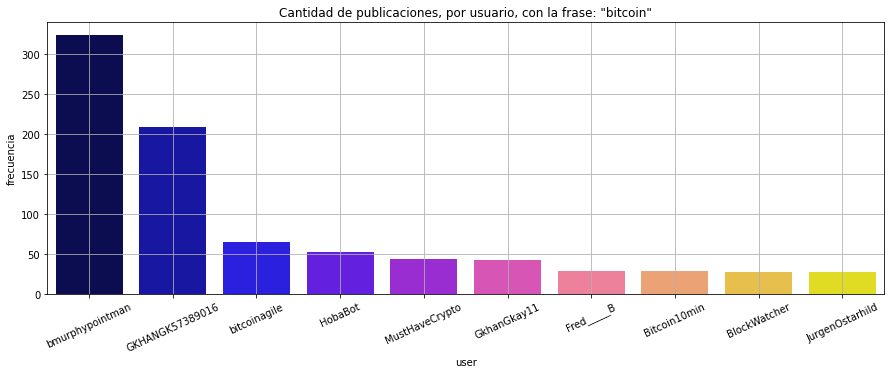

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=freq_posts.head(15), y='frecuencia', x=freq_posts.index[:15],
           palette='gnuplot2')
plt.xticks(rotation=25)
plt.title(f'Cantidad de publicaciones, por usuario, con la frase: "{query}"')
plt.grid(True)
plt.show()

In [ ]:
rts = df[df['tipo']=='RT']
print(rts.shape)
rts.head()

(21654, 13)


,tipo,user,posted_at,deltaSec,retuits,favs,followers,followings,created at,id_status,RT_user,status_time,texto
1,RT,MisaelSaTa,06/14/2021 19:22:15,36288,140,0,35,256,03/28/2010 18:25:49,1404442867456745479,maxkeiser,06/14/2021 09:17:27,RT @maxkeiser: We’ll be sacrificing Elon into ...
2,RT,WinterWinRiska,06/14/2021 19:22:14,34046,153,0,1621,1694,02/28/2021 02:38:35,1404452267600891910,CoinvoteCC,06/14/2021 09:54:48,RT @CoinvoteCC: We just released our telegram!...
3,RT,cryptohydrate,06/14/2021 19:22:14,189,15,0,1808,641,06/12/2018 07:47:38,1404594275279593472,CryptoKaleo,06/14/2021 19:19:05,RT @CryptoKaleo: #Bitcoin / $BTCSend it to $45...
5,RT,NabilFatim22_,06/14/2021 19:22:12,50313,21611,0,52,485,04/12/2018 08:53:49,1390613292083646466,CryptoPoorBoy,05/07/2021 05:23:39,RT @CryptoPoorBoy: I will give $100 to 100 Ran...
8,RT,dr_arriarta,06/14/2021 19:22:11,38274,460,0,431,1210,10/15/2020 20:56:25,1404434520758128642,newzealcoin,06/14/2021 08:44:17,RT @newzealcoin: Thank you for your participat...


In [ ]:
freq_rt = rts.groupby('user').size().to_frame()
freq_rt.columns = ['frecuencia']
freq_rt = freq_rt.sort_values('frecuencia', ascending=False).head(10)
freq_rt.head(5)

,frecuencia
user,
v4_cydia,161
kaan34785824,111
heylisagirl,66
TheCryptoLarkss,64
runm331,50


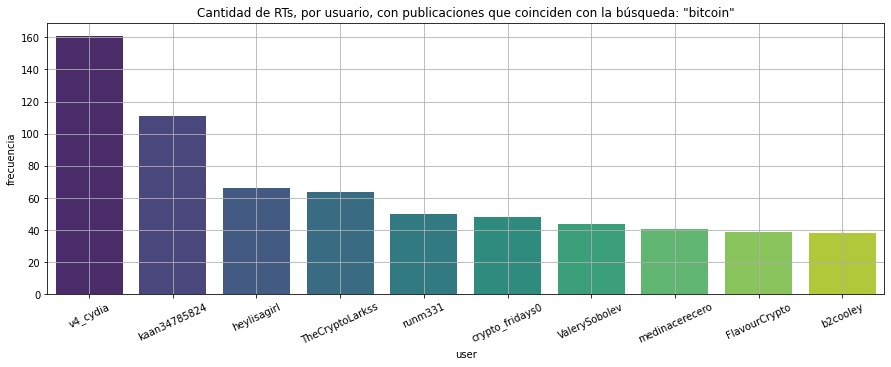

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=freq_rt.head(15), y='frecuencia', x=freq_rt.index[:15],
           palette='viridis')
plt.xticks(rotation=25)
plt.title(f'Cantidad de RTs, por usuario, con publicaciones que coinciden con la búsqueda: "{query}"')
plt.grid(True)
plt.show()

In [ ]:
rpy = df[df['tipo']=='Reply']
print(rpy.shape)
rpy.head()

(2462, 13)


,tipo,user,posted_at,deltaSec,retuits,favs,followers,followings,created at,id_status,RT_user,status_time,texto
0,Reply,WeBezos,06/14/2021 19:22:16,6729,0,0,375,74,05/02/2021 12:54:14,1404566850353180683,ArthurB,06/14/2021 17:30:07,@ArthurB Great new approach!Despite what other...
16,Reply,aarontanzy,06/14/2021 19:22:07,185,1,0,48,323,03/13/2011 03:12:27,1404594262587682819,CedYoungelman,06/14/2021 19:19:02,@CedYoungelman Indeed. The #Bitcoin Death Zone
21,Reply,CryptoKaleo,06/14/2021 19:22:04,179,0,0,319300,548,09/08/2017 14:15:10,1404594275279593472,CryptoKaleo,06/14/2021 19:19:05,#Bitcoin / $BTCDecided to get off the couch an...
84,Reply,budis02,06/14/2021 19:21:20,38223,0,0,29,722,03/30/2021 03:43:35,1404434520758128642,newzealcoin,06/14/2021 08:44:17,@newzealcoin Good nice Project👍👍👍@AprianAcil @...
99,Reply,SeptiantiRahay3,06/14/2021 19:21:13,31837,0,0,75,660,03/31/2021 05:53:35,1404461277242544130,bitop_exchange,06/14/2021 10:30:36,@bitop_exchange I very interesting this projec...


In [ ]:
freq_rpy = rpy.groupby('user').size().to_frame()
freq_rpy.columns = ['frecuencia']
freq_rpy = freq_rpy.sort_values('frecuencia', ascending=False).head(10)
freq_rpy.head(5)

,frecuencia
user,
TommyReid1122,49
michaelho77,41
lian_tju,38
Blessdave4,29
Ruhatt2,29


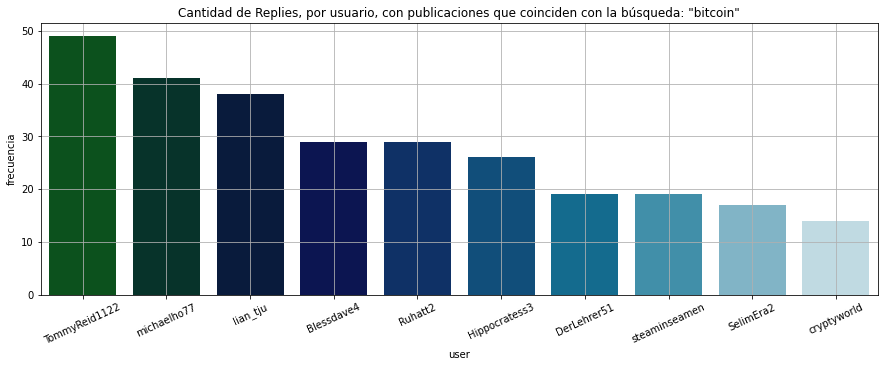

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=freq_rpy.head(15), y='frecuencia', x=freq_rpy.index[:15],
           palette="ocean")
plt.xticks(rotation=25)
plt.title(f'Cantidad de Replies, por usuario, con publicaciones que coinciden con la búsqueda: "{query}"')
plt.grid(True)
plt.show()

In [ ]:
plt.grid?

In [ ]:
sns.barplot?

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

('Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co